# **LINEAR REGRESSION**

In the last lab, you learn't about the Exploratory Data Analysis (EDA) which have a lot of importance before performing any task on the data. Afterwards, you did linear regression using the Ordinary Least Squares (OLS) method.

In this lab, you would perform **Linear Regression** on various datasets using **Gradient Descent** Method.

**DATA SETS**

From your last lab's knowledge you know that any dataset from real world can be imported as a **Dataframe** and be processed on.

But, this time direclty import the datasets from the scikit module.
Yes, scikit-learn has some inbuilt-datasets too. These however are small datasets for experimentations and learning as you would do now.

---
Refer the following links to import the respective datasets

[**Diabetes Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

[**California Housing Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)


**TASK 1**:



1.   Import these Datasets in your notebook.
2.   Treat the last column of the datasets as the Depedent Variable (Y) with the other columns as Independent variables.
1.  Do the sufficient EDA as per your needs with justifiable reasonings.







In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_diabetes, fetch_california_housing
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')



        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
Target    float64
dtype: object
                age           sex           bmi            bp            s1  \
count 

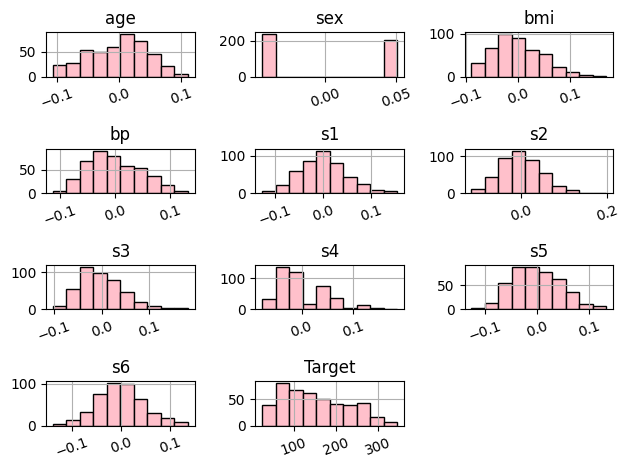

Frequency Distribution


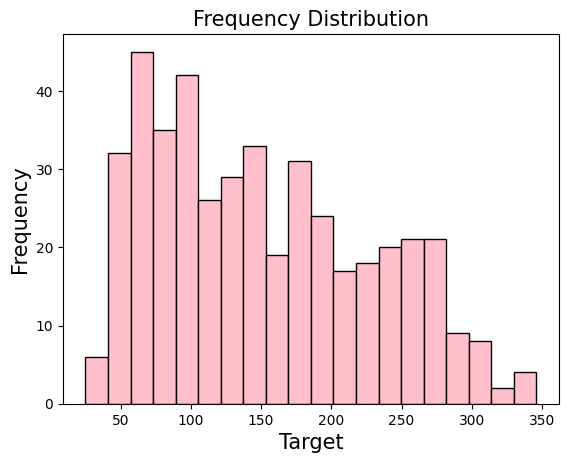

Pairplot


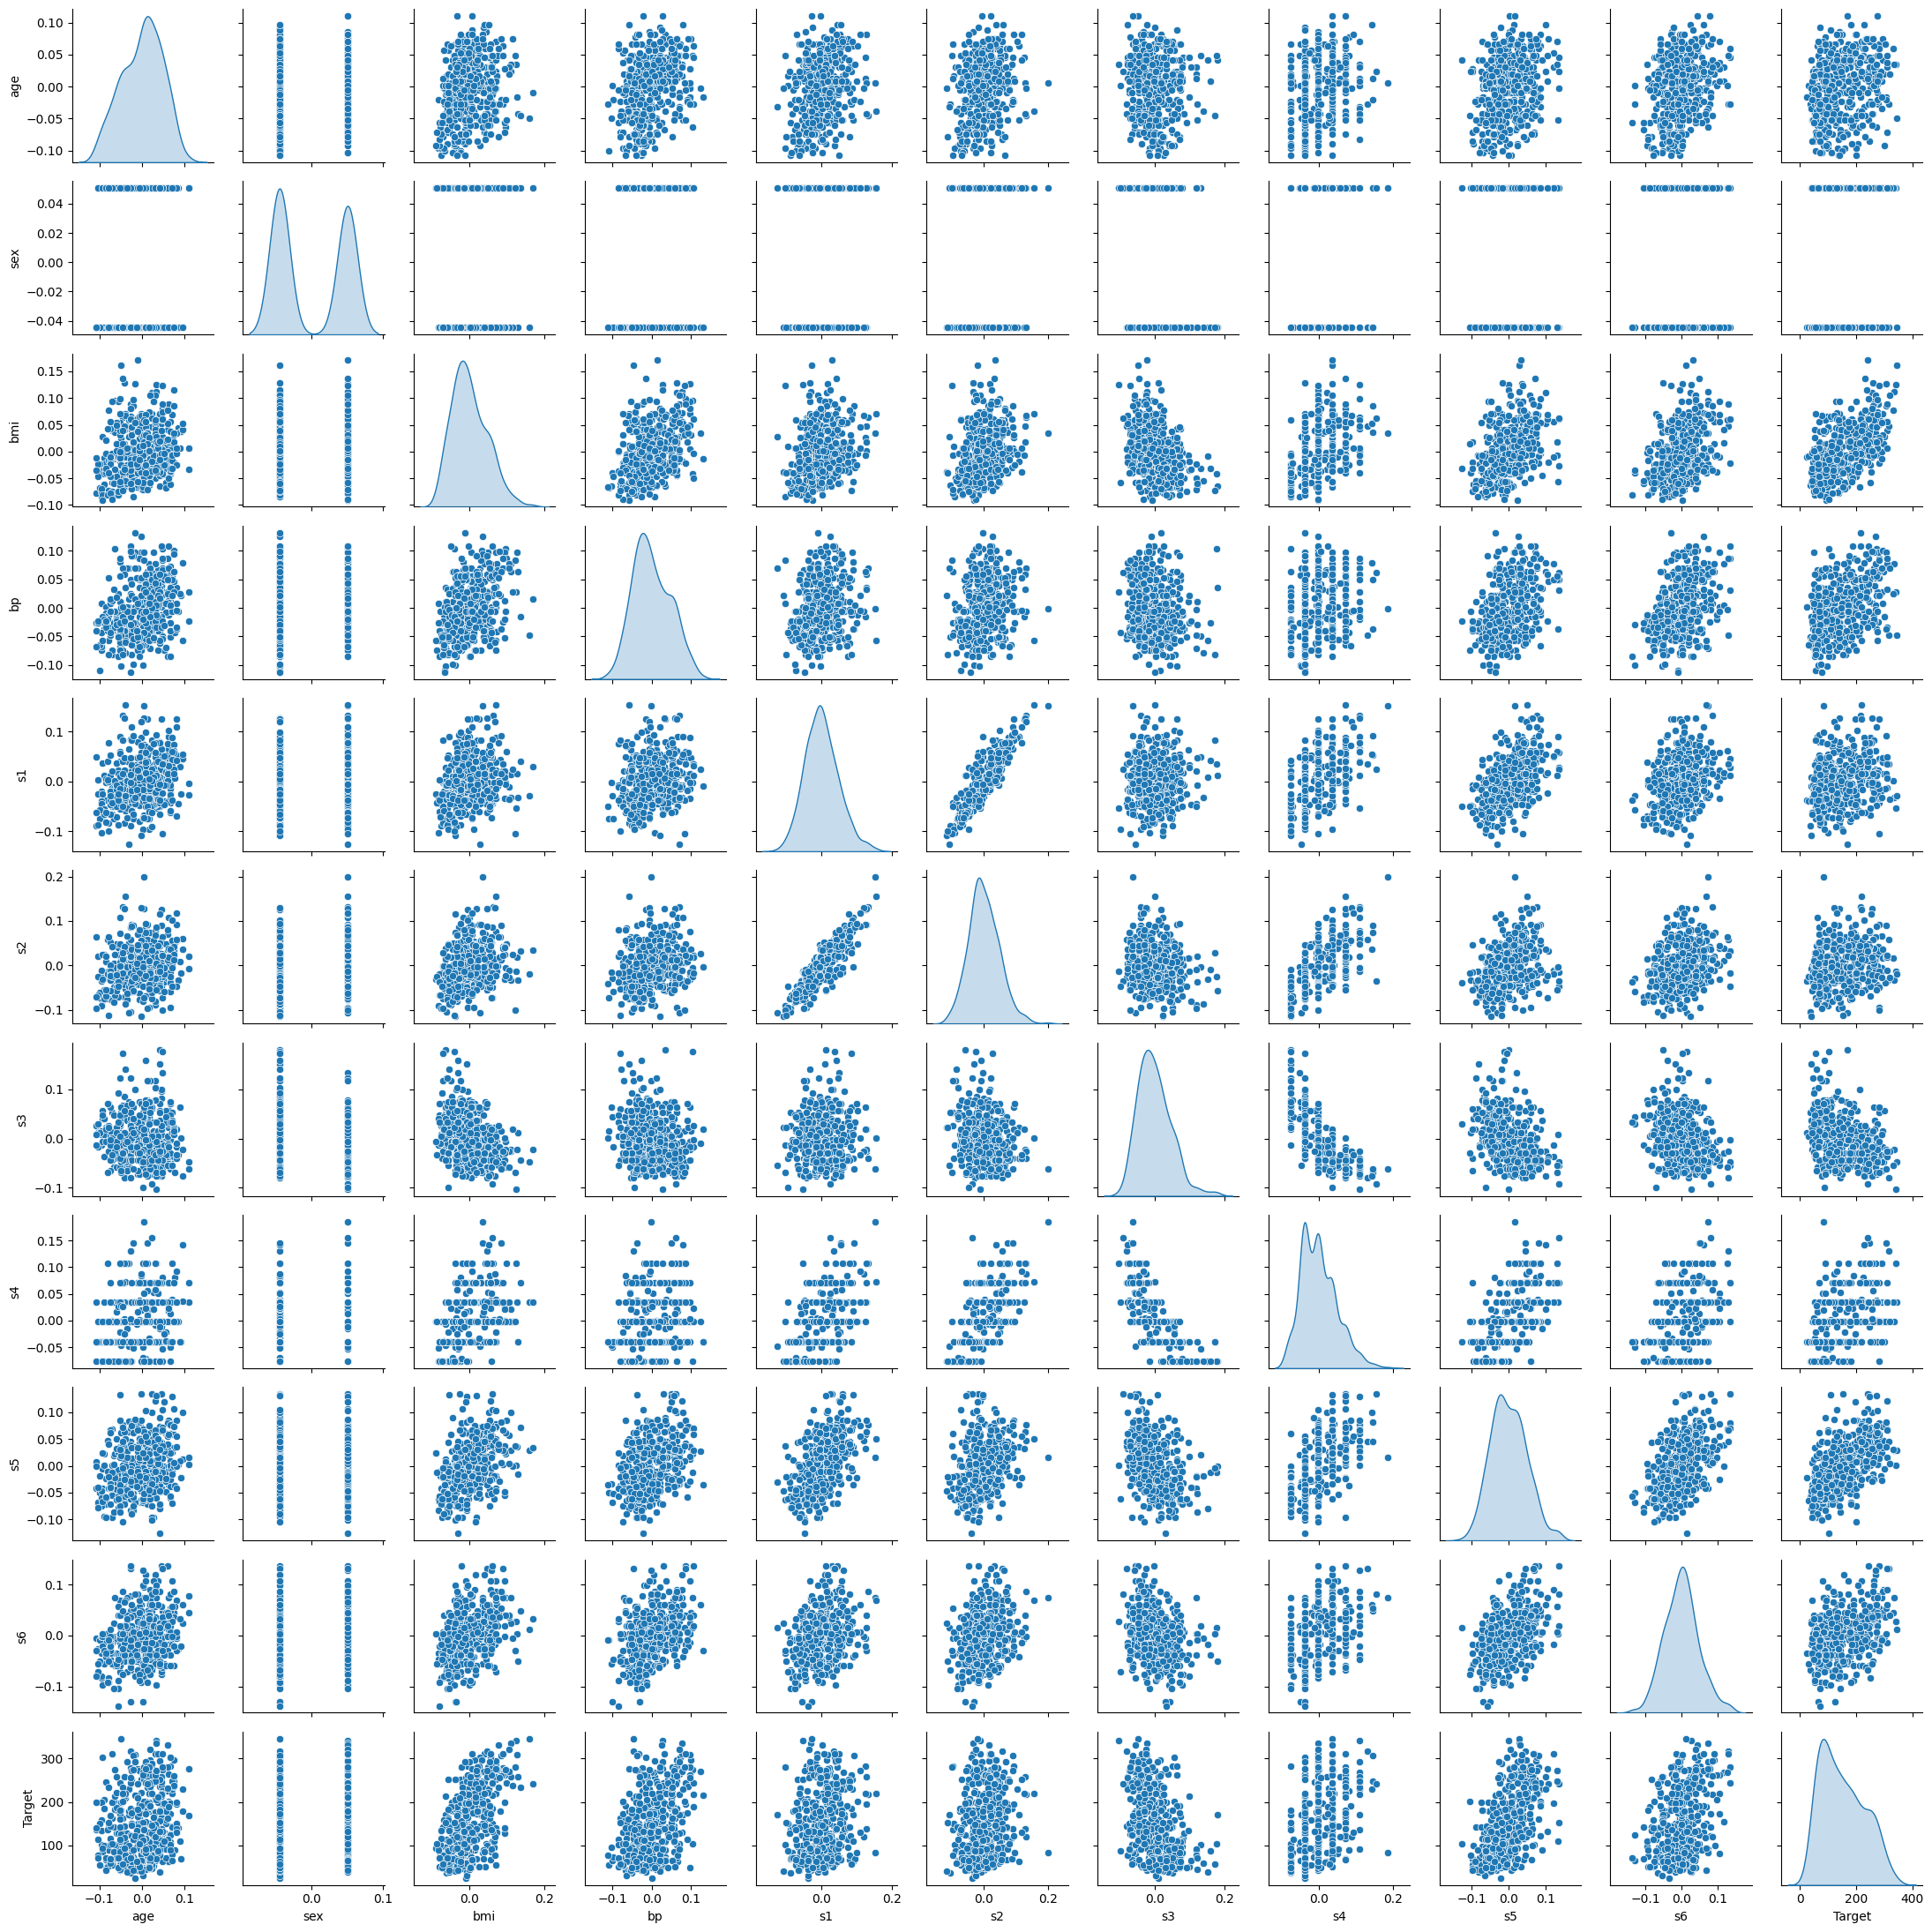

Boxplot for outliers detection


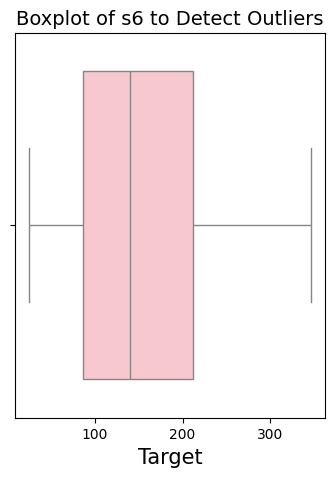

Index([], dtype='object')
             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

             

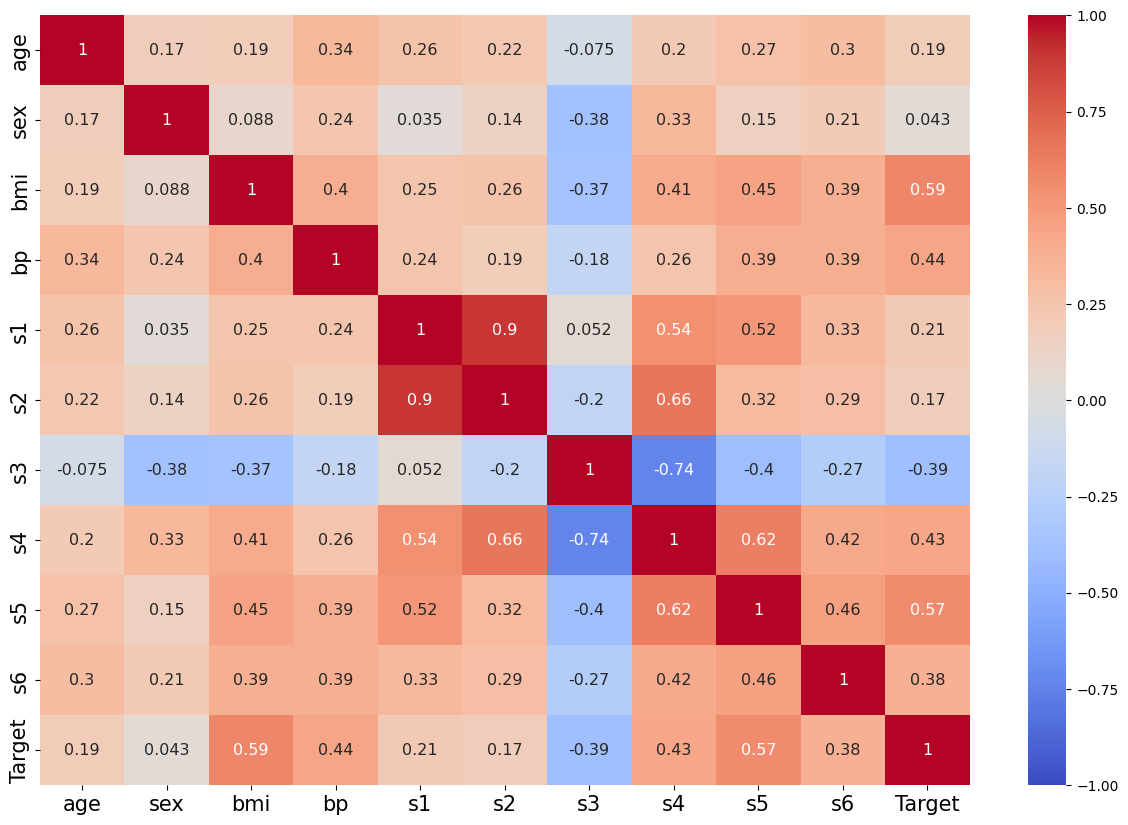

Distribution for Normality


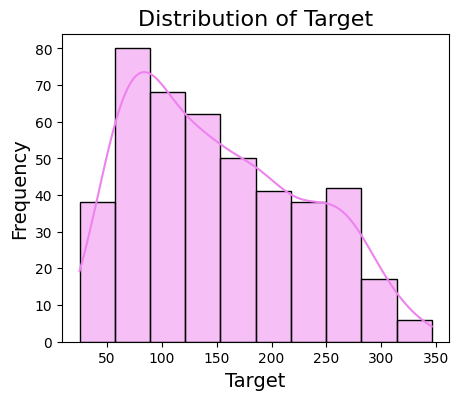

Shapiro-Wilk Test Statistic: 0.949058
P-value: 0.000000
We reject the null hypothesis (Ho). The data is not normally distributed (p < 0.05).
A value between -0.5 and 0 or between 0 and 0.5 indicates an approximately symmetric distribution and  value of 0 indicates a perfectly symmetrical distribution.


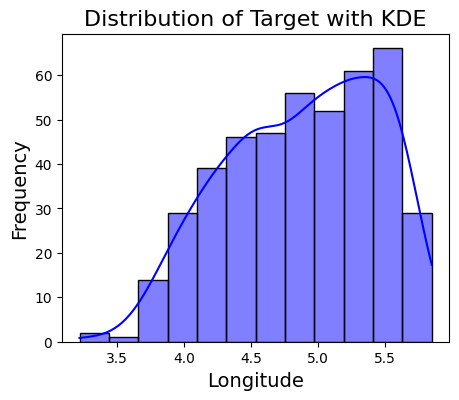

Skewness of 'Target' variable after log traansformation: -0.3325670604728491


In [2]:
diabetes_data = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df['Target'] = diabetes_data.target
print(diabetes_df.head())

print(diabetes_df.dtypes)

print(diabetes_df.describe())

diabetes_df.hist(xrot=20,edgecolor='black' , color='pink')
plt.tight_layout()
plt.show()

print('Frequency Distribution')
plt.xlabel('Target', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency Distribution', fontsize=15)
plt.hist(diabetes_df['Target'], bins=20, edgecolor='black', color='pink')
plt.show()


print('Pairplot')
sns.pairplot(diabetes_df, diag_kind='kde', size=2)
plt.tight_layout()
plt.show()


print('Boxplot for outliers detection')
plt.figure(figsize=(4, 5))
sns.boxplot(x=diabetes_df['Target'], color='pink')
plt.xlabel('Target', fontsize=15)
plt.title('Boxplot of s6 to Detect Outliers', fontsize=14)
plt.show()

df_numeric_missing= diabetes_df.columns[diabetes_df.isnull().any()]
print(df_numeric_missing)
correlation_matrix = diabetes_df.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix)

print('Heatmap')
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            annot=True,
            annot_kws={"size": 11.5},
            vmax=1,
            vmin=-1,
          )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

print('Distribution for Normality')
plt.figure(figsize=(5, 4))
target_var='Target'
sns.histplot(diabetes_df['Target'], kde=True, color='violet')
plt.title(f'Distribution of {target_var}', fontsize=16)
plt.xlabel(target_var, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

stat, p_value = shapiro(diabetes_df[target_var])
print(f"Shapiro-Wilk Test Statistic: {stat:.6f}")
print(f"P-value: {p_value:.6f}")

alpha = 0.05

if p_value < alpha:
    print(f"We reject the null hypothesis (Ho). The data is not normally distributed (p < {alpha}).")
else:
    print(f"We fail to reject the null hypothesis (Ho). The data is normally distributed (p ≥ {alpha}).")
diabetes_df['Target'].skew()

print('A value between -0.5 and 0 or between 0 and 0.5 indicates an approximately symmetric distribution and  value of 0 indicates a perfectly symmetrical distribution.')

diabetes_df['Target']=np.log(diabetes_df['Target'])
plt.figure(figsize=(5, 4))
sns.histplot(diabetes_df['Target'], kde=True, color='blue')
plt.title('Distribution of Target with KDE', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
skewness = diabetes_df['Target'].skew()
print(f"Skewness of 'Target' variable after log traansformation: {skewness}")

California Housing Dataset Information:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

California Housing Dataset Data Types:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

Descriptive Statistics for California Housing Dataset:
             MedInc      HouseAge      AveRooms     AveBe

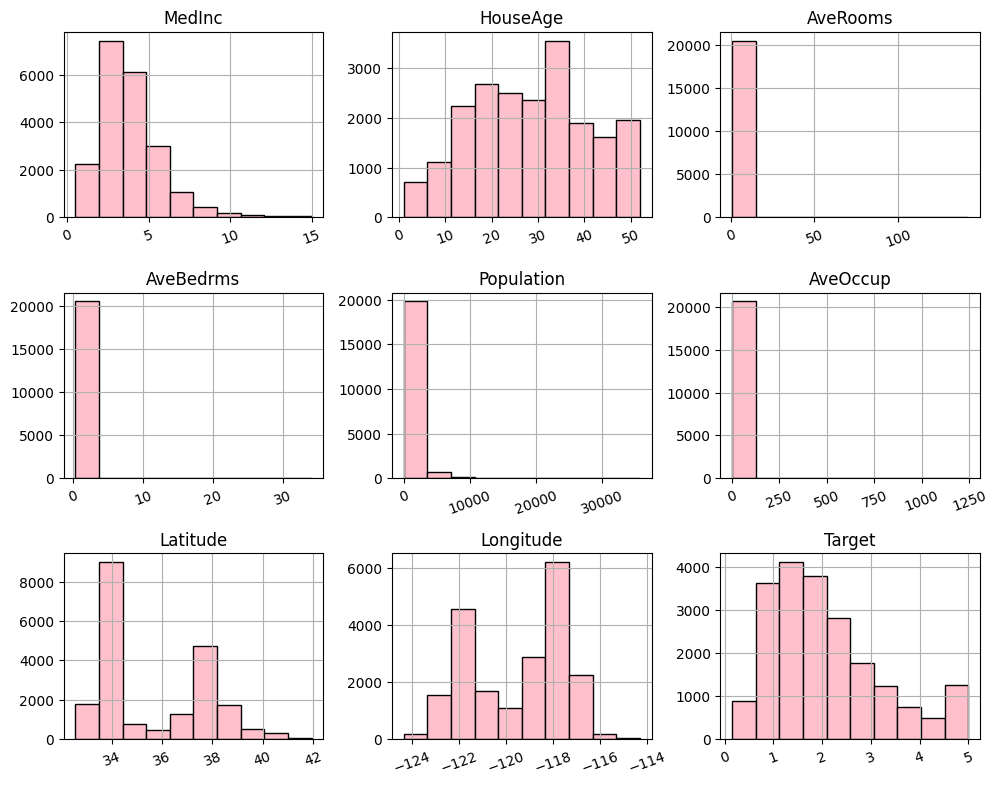

Correlation matrix


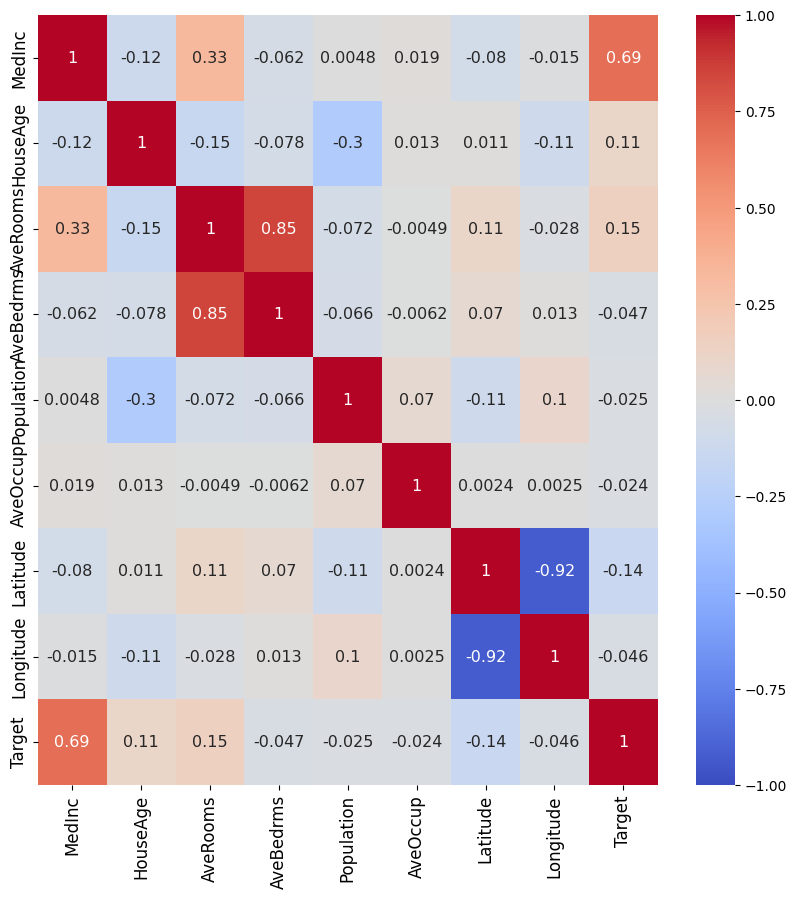

Pairplot


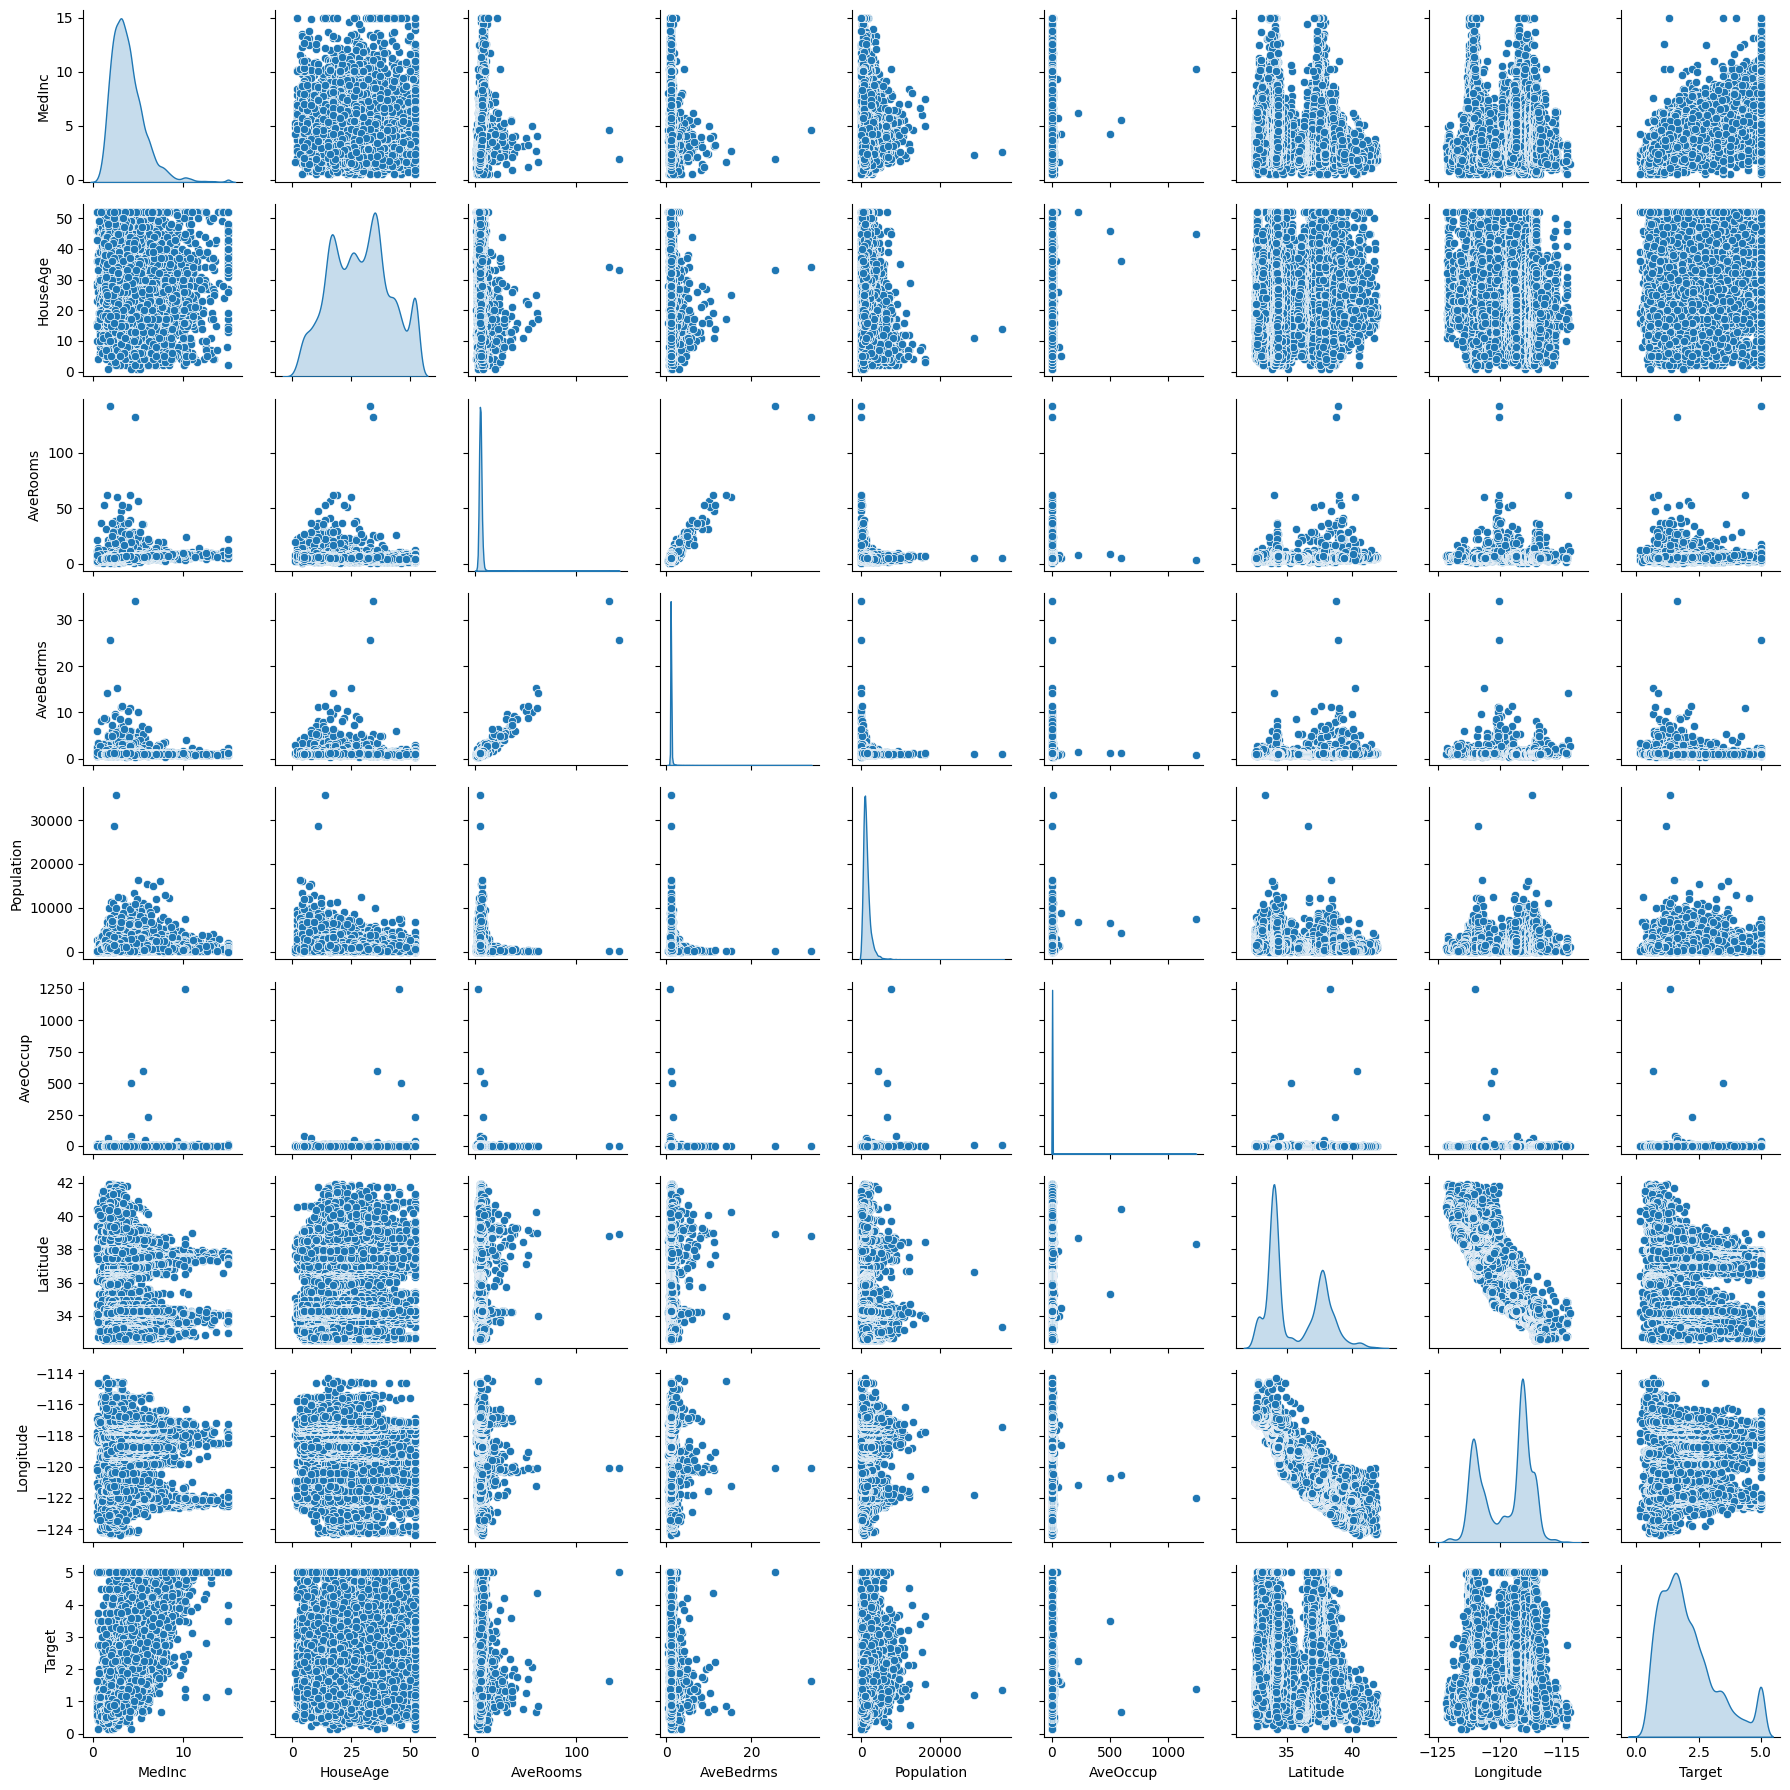

Boxplot for outliers detection


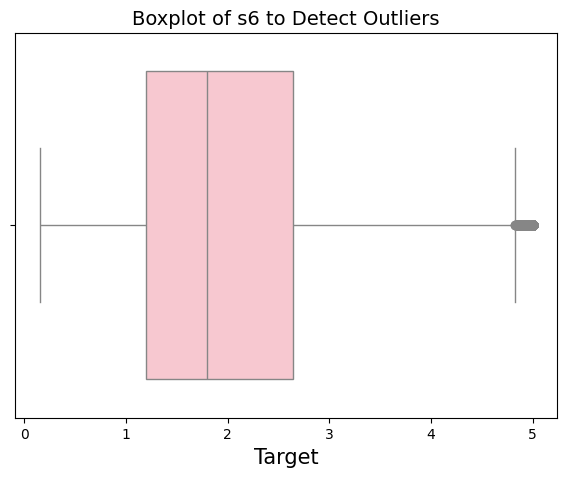

1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
Name: Target, dtype: float64
Number of rows after filtering: 19383
Missing values in columns: Index([], dtype='object')


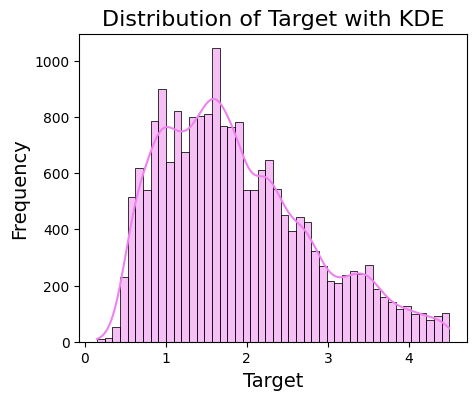

Shapiro-Wilk Test Statistic for 'Target': 0.954079
P-value for 'Target': 0.000000
We reject the null hypothesis (Ho). The data is not normally distributed (p < 0.05).
Skewness of 'Target' variable: 0.6834754825727445


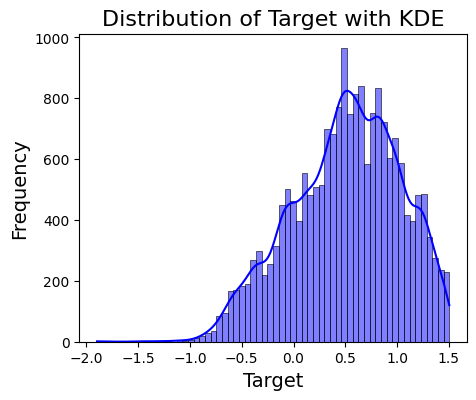

Skewness of 'Target' variable after log traansformation: -0.3480077280097155


In [3]:

warnings.filterwarnings('ignore')

california_data = fetch_california_housing()
california_df = pd.DataFrame(data=california_data.data, columns=california_data.feature_names)

california_df['Target'] = california_data.target

print("California Housing Dataset Information:")
print(california_df.head())

print("\nCalifornia Housing Dataset Data Types:")
print(california_df.dtypes)

print("\nDescriptive Statistics for California Housing Dataset:")
print(california_df.describe())

california_df.hist(xrot=20, edgecolor='black', color='pink', figsize=(10, 8))
plt.tight_layout()
plt.show()

print('Correlation matrix')
correlation_matrix_california = california_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_california, cmap='coolwarm', annot=True, annot_kws={"size": 11.5}, vmax=1, vmin=-1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


print('Pairplot')
sns.pairplot(california_df, diag_kind='kde', height=2)
plt.tight_layout()
plt.show()

print('Boxplot for outliers detection')
plt.figure(figsize=(7, 5))
sns.boxplot(x=california_df['Target'], color='pink')
plt.xlabel('Target', fontsize=15)
plt.title('Boxplot of s6 to Detect Outliers', fontsize=14)
plt.show()

california_df= california_df[california_df['Target'] <= 4.5]

print(california_df['Target'].head())
print(f"Number of rows after filtering: {len(california_df['Target'])}")
missing_values = california_df.columns[california_df.isnull().any()]
print(f"Missing values in columns: {missing_values}")


plt.figure(figsize=(5, 4))
sns.histplot(california_df['Target'], kde=True, color='violet')
plt.title('Distribution of Target with KDE', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


stat, p_value = shapiro(california_df['Target'])
print(f"Shapiro-Wilk Test Statistic for 'Target': {stat:.6f}")
print(f"P-value for 'Target': {p_value:.6f}")
alpha = 0.05
if p_value < alpha:
    print(f"We reject the null hypothesis (Ho). The data is not normally distributed (p < {alpha}).")
else:
    print(f"We fail to reject the null hypothesis (Ho). The data is normally distributed (p ≥ {alpha}).")
skewness = california_df['Target'].skew()
print(f"Skewness of 'Target' variable: {skewness}")



california_df['Target']=np.log(california_df['Target'])
plt.figure(figsize=(5, 4))
sns.histplot(california_df['Target'], kde=True, color='blue')
plt.title('Distribution of Target with KDE', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
skewness = california_df['Target'].skew()
print(f"Skewness of 'Target' variable after log traansformation: {skewness}")

**for california house pricing**

**TASK 2**:


1.   Split the data into Train (85%) and Test Set (15%).




In [4]:

X_diabetes = diabetes_df.drop(columns=['Target'])
Y_diabetes = diabetes_df['Target']
X_train_diabetes, X_test_diabetes, Y_train_diabetes, Y_test_diabetes = train_test_split(X_diabetes, Y_diabetes, test_size=0.15, random_state=42)
print(f"Diabetes - Training set size: {X_train_diabetes.shape} samples")
print(f"Diabetes - Test set size: {X_test_diabetes.shape} samples")


X_california = california_df.drop(columns=['Target'])
Y_california = california_df['Target']
X_train_california, X_test_california, Y_train_california, Y_test_california = train_test_split(X_california, Y_california, test_size=0.15, random_state=42)
print(f"California Housing - Training set size: {X_train_california.shape} samples")
print(f"California Housing - Test set size: {X_test_california.shape} samples")


Diabetes - Training set size: (375, 10) samples
Diabetes - Test set size: (67, 10) samples
California Housing - Training set size: (16475, 8) samples
California Housing - Test set size: (2908, 8) samples


**TASK 3**


1.   Implement a Linear Regression Model with Stochastic Gradient Descent Method.
2.   The implementation of the stochastic gradient descent method should be as per the method taught in the theory class. Make sure the update rule's implementation should be done by you **(No inbuilt direct function should be used for this task).**
3.   Try different values of the learning rates and epochs. Understand their effects on the training process.
4.   Make sure to have multiple 2D plots for the loss function w.r.t. Iterations and Epochs for different learning rates.



In [5]:
def SGD(X, y, learning_rate=0.01, epochs=10):
  m,n=X.shape[0], X.shape[1]
  w=np.zeros(n)
  loss_history = []
  for epoch in range(epochs):
    for i in range(m):
      y_pred=np.dot(X[i],w)
      w=w-learning_rate *(y_pred-y[i])*X[i]
    loss = np.mean((np.dot(X,w) - y) ** 2) / 2
    loss_history.append(loss)
    if epoch % 10 == 0:
      print(f"Epoch {epoch} | Loss: {loss}")
  return w, loss_history



In [6]:
scaler_diabetes = StandardScaler()
X_train_diabetes_scaled = scaler_diabetes.fit_transform(X_train_diabetes)
X_train_diabetes_scaled = np.c_[np.ones(X_train_diabetes_scaled.shape[0]), X_train_diabetes_scaled]  # Add intercept

scaler_california = StandardScaler()
X_train_california_scaled = scaler_california.fit_transform(X_train_california)
X_train_california_scaled = np.c_[np.ones(X_train_california_scaled.shape[0]), X_train_california_scaled]  # Add intercept

Epoch 0 | Loss: 0.19542677925580082
Epoch 10 | Loss: 0.1946698169913353
Epoch 20 | Loss: 0.19467563638868232
Epoch 30 | Loss: 0.1946757847751922
Epoch 40 | Loss: 0.19467578853507742
Epoch 50 | Loss: 0.19467578863033183
Epoch 60 | Loss: 0.19467578863274526
Epoch 70 | Loss: 0.19467578863280596
Epoch 80 | Loss: 0.1946757886328073
Epoch 90 | Loss: 0.19467578863280793
Epoch 100 | Loss: 0.19467578863280777
Epoch 110 | Loss: 0.19467578863280774
Epoch 120 | Loss: 0.19467578863280782
Epoch 130 | Loss: 0.19467578863280777
Epoch 140 | Loss: 0.1946757886328075
Epoch 150 | Loss: 0.19467578863280802
Epoch 160 | Loss: 0.19467578863280827
Epoch 170 | Loss: 0.19467578863280802
Epoch 180 | Loss: 0.1946757886328079
Epoch 190 | Loss: 0.19467578863280816
Epoch 200 | Loss: 0.1946757886328077
Epoch 210 | Loss: 0.19467578863280807
Epoch 220 | Loss: 0.19467578863280807
Epoch 230 | Loss: 0.1946757886328077
Epoch 240 | Loss: 0.1946757886328077
Epoch 250 | Loss: 0.1946757886328079
Epoch 260 | Loss: 0.194675788632

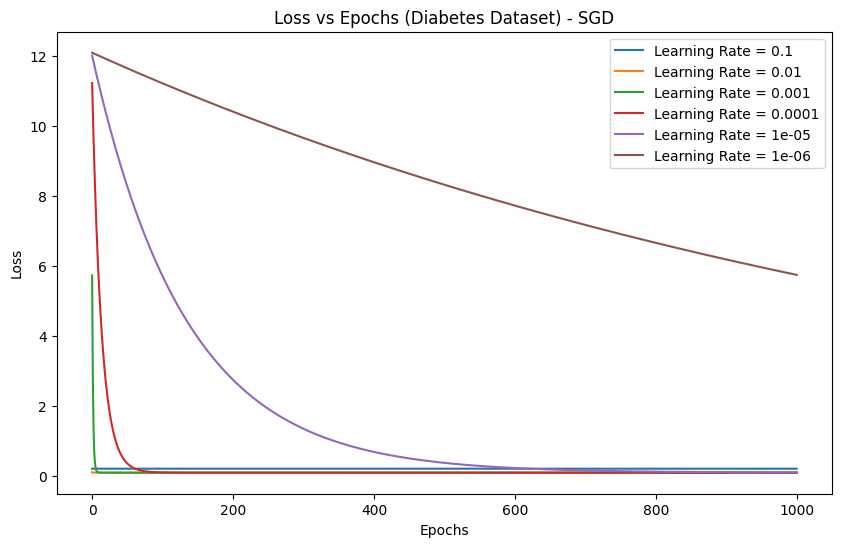

In [7]:
learning_rates = [0.1,0.01,0.001,0.0001, 0.00001, 0.000001]
epochs = 1000
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    w_diabetes, loss_history_diabetes = SGD(X_train_diabetes_scaled, Y_train_diabetes.values, learning_rate=lr, epochs=epochs)
    plt.plot(range(epochs), loss_history_diabetes, label=f"Learning Rate = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (Diabetes Dataset) - SGD")
plt.legend()
plt.show()



Epoch 0 | Loss: 0.07957009757540477
Epoch 10 | Loss: 0.05658925877606336
Epoch 20 | Loss: 0.05537745993874978
Epoch 30 | Loss: 0.055220700214187006
Epoch 40 | Loss: 0.055187947770380046
Epoch 50 | Loss: 0.05517905267104438
Epoch 60 | Loss: 0.05517622148585507
Epoch 70 | Loss: 0.05517519084423119
Epoch 80 | Loss: 0.05517477102600486
Epoch 90 | Loss: 0.05517458578080533
Epoch 100 | Loss: 0.05517449993568738
Epoch 110 | Loss: 0.055174459058607316
Epoch 120 | Loss: 0.05517443931571704
Epoch 130 | Loss: 0.055174429711412475
Epoch 140 | Loss: 0.055174425022428336
Epoch 150 | Loss: 0.05517442272912283
Epoch 160 | Loss: 0.055174421606524256
Epoch 170 | Loss: 0.0551744210567637
Epoch 180 | Loss: 0.05517442078747742
Epoch 190 | Loss: 0.0551744206555607
Epoch 200 | Loss: 0.05517442059093466
Epoch 210 | Loss: 0.05517442055927354
Epoch 220 | Loss: 0.05517442054376219
Epoch 230 | Loss: 0.055174420536162824
Epoch 240 | Loss: 0.05517442053243975
Epoch 250 | Loss: 0.05517442053061571
Epoch 260 | Loss: 

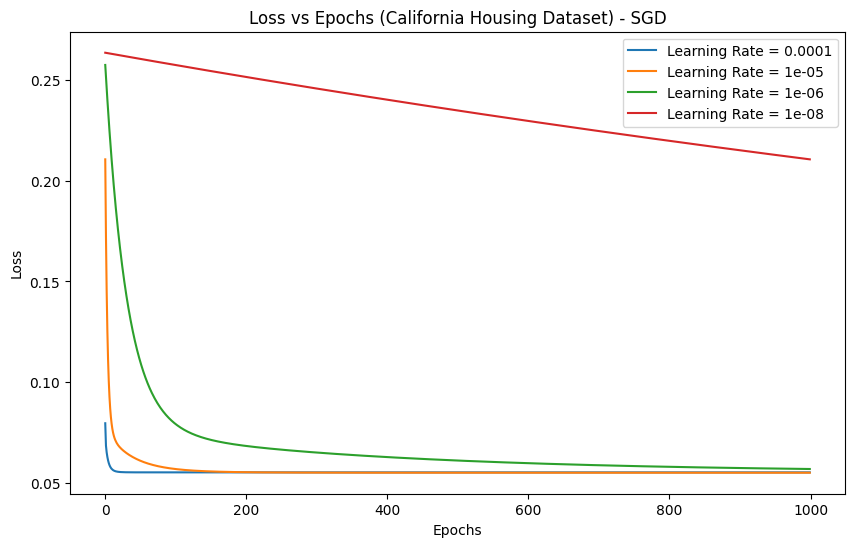

In [8]:
learning_rates = [0.0001, 0.00001, 0.000001, 0.00000001]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    w_california, loss_history_california = SGD(X_train_california_scaled, Y_train_california.values, learning_rate=lr, epochs=epochs)
    plt.plot(range(epochs), loss_history_california, label=f"Learning Rate = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (California Housing Dataset) - SGD")
plt.legend()
plt.show()

**TASK 4**:
  

1.   Test the above model on the Test set as already split above.
2.   Report the final performance metrics (RMSE, MAE,R² ).



In [9]:
w_diabetes, loss_history_diabetes = SGD(X_train_diabetes_scaled, Y_train_diabetes.values, learning_rate=0.001, epochs=1000)
w_california, loss_history_california = SGD(X_train_california_scaled, Y_train_california.values, learning_rate=0.000000001, epochs=1000)

Epoch 0 | Loss: 5.7209868378850235
Epoch 10 | Loss: 0.08415240882964746
Epoch 20 | Loss: 0.08077137529073589
Epoch 30 | Loss: 0.08065347596397054
Epoch 40 | Loss: 0.08056249159012509
Epoch 50 | Loss: 0.08048502437019897
Epoch 60 | Loss: 0.08041691865132569
Epoch 70 | Loss: 0.08035574110358346
Epoch 80 | Loss: 0.0802999996364926
Epoch 90 | Loss: 0.0802487449851844
Epoch 100 | Loss: 0.0802013436428321
Epoch 110 | Loss: 0.0801573481499072
Epoch 120 | Loss: 0.08011642283118744
Epoch 130 | Loss: 0.08007830111303786
Epoch 140 | Loss: 0.08004276084455998
Epoch 150 | Loss: 0.08000960989575735
Epoch 160 | Loss: 0.07997867763251994
Epoch 170 | Loss: 0.07994980976136377
Epoch 180 | Loss: 0.07992286511463019
Epoch 190 | Loss: 0.07989771356058414
Epoch 200 | Loss: 0.07987423457243696
Epoch 210 | Loss: 0.07985231618951134
Epoch 220 | Loss: 0.0798318542173206
Epoch 230 | Loss: 0.07981275157811568
Epoch 240 | Loss: 0.07979491776045292
Epoch 250 | Loss: 0.07977826833749928
Epoch 260 | Loss: 0.079762724

In [10]:
X_test_diabetes_scaled = np.c_[np.ones(X_test_diabetes.shape[0]), X_test_diabetes]
X_test_california_scaled = np.c_[np.ones(X_test_california.shape[0]), X_test_california]


y_pred_diabetes = X_test_diabetes_scaled.dot(w_diabetes)
y_pred_california = X_test_california_scaled.dot(w_california)


mse_diabetes = np.mean((y_pred_diabetes - Y_test_diabetes) ** 2)
mse_california = np.mean((y_pred_california - Y_test_california) ** 2)

print(f"Test MSE on Diabetes Dataset: {mse_diabetes}")
print(f"Test MSE on California Housing Dataset: {mse_california}")


Test MSE on Diabetes Dataset: 0.27290972834913096
Test MSE on California Housing Dataset: 0.4990065214976611


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Diabetes dataset performance
y_pred_diabetes = X_test_diabetes_scaled.dot(w_diabetes)
rmse_diabetes, mae_diabetes, r2_diabetes = evaluate_model(Y_test_diabetes, y_pred_diabetes)
print(f"Diabetes Dataset - RMSE: {rmse_diabetes}, MAE: {mae_diabetes}, R²: {r2_diabetes}")

# California Housing dataset performance
y_pred_california = X_test_california_scaled.dot(w_california)
rmse_california, mae_california, r2_california = evaluate_model(Y_test_california, y_pred_california)
print(f"California Housing Dataset - RMSE: {rmse_california}, MAE: {mae_california}, R²: {r2_california}")


Diabetes Dataset - RMSE: 0.5224076266184587, MAE: 0.4481590537273891, R²: 0.04024541562405992
California Housing Dataset - RMSE: 0.7064039364964362, MAE: 0.5383835502789153, R²: -0.7945853482492071


**TASK 5**:
  

1.   Do the same once again, but this time use the inbuilt gradient descent algorithm (**SGDRegressor**).
2.   And compare the performance metrics (RMSE, MAE, R² ) with your own implementation of Gradient Descent as attained above.



In [12]:
from sklearn.linear_model import SGDRegressor

# Train SGDRegressor for the Diabetes dataset
sgd_reg_diabetes = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42)
sgd_reg_diabetes.fit(X_train_diabetes_scaled, Y_train_diabetes)
y_pred_sgd_diabetes = sgd_reg_diabetes.predict(X_test_diabetes_scaled)
rmse_sgd_diabetes, mae_sgd_diabetes, r2_sgd_diabetes = evaluate_model(Y_test_diabetes, y_pred_sgd_diabetes)
print(f"SGDRegressor - Diabetes Dataset - RMSE: {rmse_sgd_diabetes}, MAE: {mae_sgd_diabetes}, R²: {r2_sgd_diabetes}")

# Train SGDRegressor for the California Housing dataset
sgd_reg_california = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.000000001, random_state=42)
sgd_reg_california.fit(X_train_california_scaled, Y_train_california)
y_pred_sgd_california = sgd_reg_california.predict(X_test_california_scaled)
rmse_sgd_california, mae_sgd_california, r2_sgd_california = evaluate_model(Y_test_california, y_pred_sgd_california)
print(f"SGDRegressor - California Housing Dataset - RMSE: {rmse_sgd_california}, MAE: {mae_sgd_california}, R²: {r2_sgd_california}")


SGDRegressor - Diabetes Dataset - RMSE: 0.5343393522183639, MAE: 0.4547615380944388, R²: -0.004096601986727899
SGDRegressor - California Housing Dataset - RMSE: 0.7251551725550007, MAE: 0.6140554476609341, R²: -0.8911230781573554


**TASK 6**:


1.   The above tasks should be done for both the datasets as imported in *Task 1*.
2.   And, you must analyze the difference in the results that you get in *Task 4* and *Task 5*.



In [29]:
def comparison(X_train, y_train, X_test, y_test, epochs=10, learning_rate=0.001):

    custom_w, custom_losses = SGD(X_train, y_train.values, learning_rate=learning_rate, epochs=epochs)

    sgd_regressor = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=learning_rate)
    sgd_regressor_loss_history = []

    for epoch in range(epochs):
        sgd_regressor.partial_fit(X_train, y_train)
        y_pred = sgd_regressor.predict(X_train)
        loss = np.mean((y_pred - y_train) ** 2) / 2
        sgd_regressor_loss_history.append(loss)

    custom_sgd_predictions = np.dot(X_test, custom_w)
    sgd_regressor_predictions = sgd_regressor.predict(X_test)

    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, custom_sgd_predictions, label='Custom SGD Predictions', color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Custom SGD Predictions")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, sgd_regressor_predictions, label='SGD Regressor Predictions', color='green')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("SGD Regressor Predictions")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print('\n')
    epochs_range = range(1, len(custom_losses) + 1)
    plt.plot(epochs_range, custom_losses, label='Custom SGD Loss', color='blue')
    plt.plot(epochs_range, sgd_regressor_loss_history, label='SGD Regressor Loss', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs for Custom SGD and SGD Regressor')
    plt.legend()
    plt.show()

    custom_mae = mean_absolute_error(y_test, custom_sgd_predictions)
    custom_mse = mean_squared_error(y_test, custom_sgd_predictions)
    custom_rmse = np.sqrt(custom_mse)
    custom_r2 = r2_score(y_test, custom_sgd_predictions)

    sgd_regressor_mae = mean_absolute_error(y_test, sgd_regressor_predictions)
    sgd_regressor_mse = mean_squared_error(y_test, sgd_regressor_predictions)
    sgd_regressor_rmse = np.sqrt(sgd_regressor_mse)
    sgd_regressor_r2 = r2_score(y_test, sgd_regressor_predictions)

    print("Custom SGD Model Metrics:")
    print(f"Mean Absolute Error (MAE): {custom_mae:.4f}")
    print(f"Mean Squared Error (MSE): {custom_mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {custom_rmse:.4f}")
    print(f"R² Score: {custom_r2:.4f}")
    print("\nSGD Regressor Model Metrics:")
    print(f"Mean Absolute Error (MAE): {sgd_regressor_mae:.4f}")
    print(f"Mean Squared Error (MSE): {sgd_regressor_mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {sgd_regressor_rmse:.4f}")
    print(f"R² Score: {sgd_regressor_r2:.4f}")
    print("\nAnalysis of Results:")
    if custom_r2 > sgd_regressor_r2:
        print("The Custom SGD model performed better in terms of R² score.")
    else:
        print("The SGD Regressor model performed better in terms of R² score.")

    print(f"Difference in MSE: {abs(custom_mse - sgd_regressor_mse):.4f}")
    print(f"Difference in MAE: {abs(custom_mae - sgd_regressor_mae):.4f}")
    print(f"Difference in RMSE: {abs(custom_rmse - sgd_regressor_rmse):.4f}")


Epoch 0 | Loss: 5.7209868378850235
Epoch 10 | Loss: 0.08415240882964746
Epoch 20 | Loss: 0.08077137529073589
Epoch 30 | Loss: 0.08065347596397054
Epoch 40 | Loss: 0.08056249159012509
Epoch 50 | Loss: 0.08048502437019897
Epoch 60 | Loss: 0.08041691865132569
Epoch 70 | Loss: 0.08035574110358346
Epoch 80 | Loss: 0.0802999996364926
Epoch 90 | Loss: 0.0802487449851844
Epoch 100 | Loss: 0.0802013436428321
Epoch 110 | Loss: 0.0801573481499072
Epoch 120 | Loss: 0.08011642283118744
Epoch 130 | Loss: 0.08007830111303786
Epoch 140 | Loss: 0.08004276084455998
Epoch 150 | Loss: 0.08000960989575735
Epoch 160 | Loss: 0.07997867763251994
Epoch 170 | Loss: 0.07994980976136377
Epoch 180 | Loss: 0.07992286511463019
Epoch 190 | Loss: 0.07989771356058414
Epoch 200 | Loss: 0.07987423457243696
Epoch 210 | Loss: 0.07985231618951134
Epoch 220 | Loss: 0.0798318542173206
Epoch 230 | Loss: 0.07981275157811568
Epoch 240 | Loss: 0.07979491776045292
Epoch 250 | Loss: 0.07977826833749928
Epoch 260 | Loss: 0.079762724

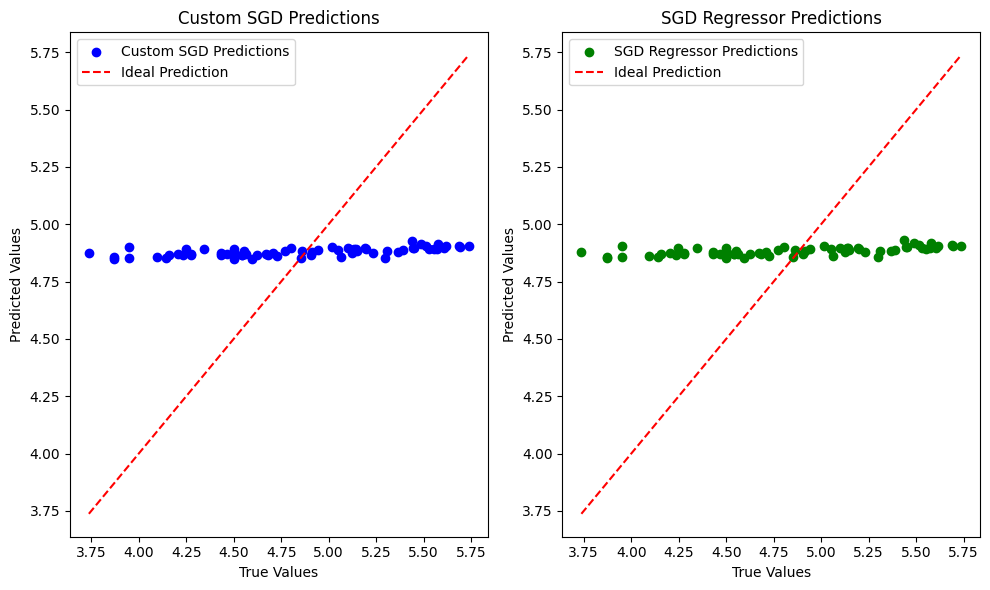

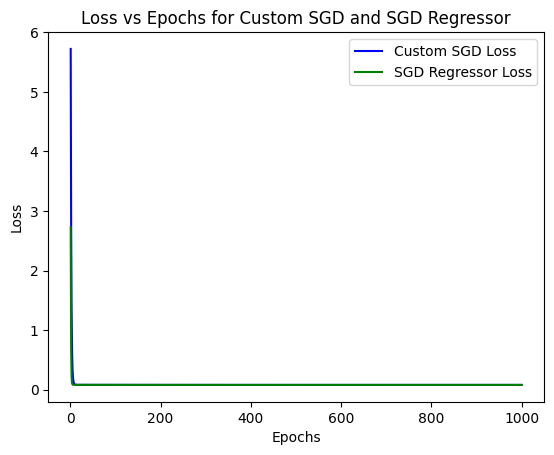

Custom SGD Model Metrics:
Mean Absolute Error (MAE): 0.4482
Mean Squared Error (MSE): 0.2729
Root Mean Squared Error (RMSE): 0.5224
R² Score: 0.0402

SGD Regressor Model Metrics:
Mean Absolute Error (MAE): 0.4483
Mean Squared Error (MSE): 0.2733
Root Mean Squared Error (RMSE): 0.5227
R² Score: 0.0390

Analysis of Results:
The Custom SGD model performed better in terms of R² score.
Difference in MSE: 0.0003
Difference in MAE: 0.0002
Difference in RMSE: 0.0003


In [30]:
comparison(X_train_diabetes_scaled, Y_train_diabetes, X_test_diabetes_scaled, Y_test_diabetes, epochs=1000, learning_rate=0.001)

Epoch 0 | Loss: 0.2636764590158611
Epoch 10 | Loss: 0.2636140698199051
Epoch 20 | Loss: 0.26355170161933456
Epoch 30 | Loss: 0.2634893544067741
Epoch 40 | Loss: 0.26342702817485125
Epoch 50 | Loss: 0.2633647229161959
Epoch 60 | Loss: 0.263302438623441
Epoch 70 | Loss: 0.2632401752892221
Epoch 80 | Loss: 0.26317793290617736
Epoch 90 | Loss: 0.2631157114669479
Epoch 100 | Loss: 0.26305351096417734
Epoch 110 | Loss: 0.2629913313905121
Epoch 120 | Loss: 0.26292917273860134
Epoch 130 | Loss: 0.2628670350010969
Epoch 140 | Loss: 0.2628049181706533
Epoch 150 | Loss: 0.262742822239928
Epoch 160 | Loss: 0.26268074720158097
Epoch 170 | Loss: 0.2626186930482747
Epoch 180 | Loss: 0.2625566597726748
Epoch 190 | Loss: 0.2624946473674494
Epoch 200 | Loss: 0.2624326558252693
Epoch 210 | Loss: 0.26237068513880807
Epoch 220 | Loss: 0.26230873530074195
Epoch 230 | Loss: 0.2622468063037499
Epoch 240 | Loss: 0.26218489814051366
Epoch 250 | Loss: 0.26212301080371747
Epoch 260 | Loss: 0.2620611442860485
Epoc

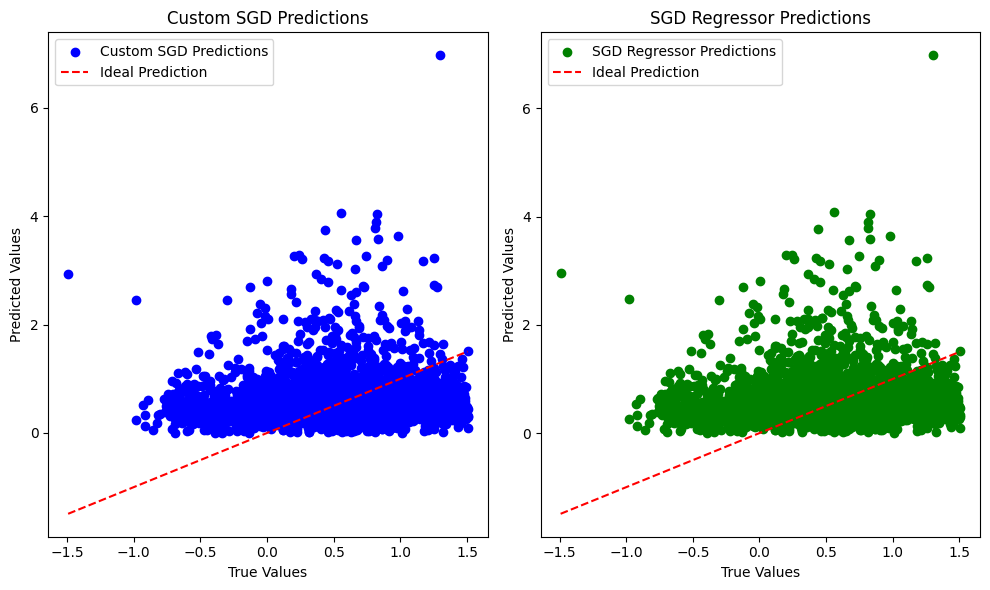

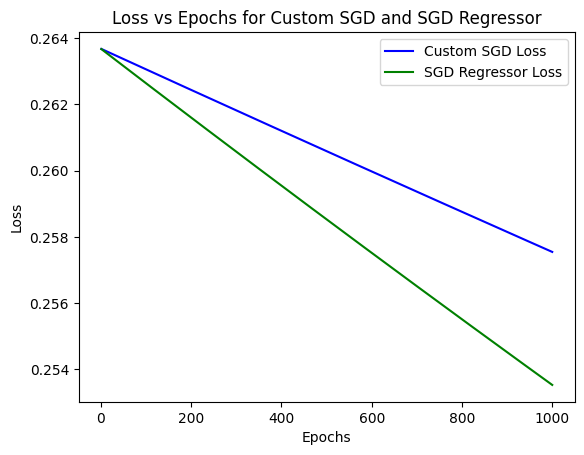

Custom SGD Model Metrics:
Mean Absolute Error (MAE): 0.5384
Mean Squared Error (MSE): 0.4990
Root Mean Squared Error (RMSE): 0.7064
R² Score: -0.7946

SGD Regressor Model Metrics:
Mean Absolute Error (MAE): 0.5391
Mean Squared Error (MSE): 0.5013
Root Mean Squared Error (RMSE): 0.7080
R² Score: -0.8029

Analysis of Results:
The Custom SGD model performed better in terms of R² score.
Difference in MSE: 0.0023
Difference in MAE: 0.0007
Difference in RMSE: 0.0016


In [31]:
comparison(X_train_california_scaled, Y_train_california, X_test_california_scaled, Y_test_california, epochs=1000, learning_rate=0.000000001)